In [1]:
import os
os.chdir("../")

In [2]:
from src.entity import AgentState, SessionLocal, User
from langchain_core.runnables.config import RunnableConfig
from langgraph.graph import StateGraph, END

In [3]:
def get_current_user(state: AgentState, config: RunnableConfig):
    print("Retrieving the current user based on user ID.")
    user_id = config["configurable"].get("current_user_id", None)
    if not user_id:
        state["current_user"] = "User not found"
        print("No user ID provided in the configuration.")
        return state
    session = SessionLocal()
    try:
        user = session.query(User).filter(User.id == int(user_id)).first()
        if user:
            state["current_user"] = user.name
            print(f"Current user set to: {state['current_user']}")
        else:
            state["current_user"] = "User not found"
            print("User not found in the database.")
    except Exception as e:
        state["current_user"] = "Error retrieving user"
        print(f"Error retrieving user: {str(e)}")
    finally:
        session.close()
    return state

In [4]:
workflow = StateGraph(AgentState)

workflow.add_node("get_current_user", get_current_user)
workflow.set_entry_point("get_current_user")
workflow.add_edge("get_current_user", END)
app = workflow.compile()

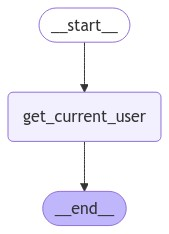

In [5]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except:
    pass

In [6]:
config = {"configurable": {"current_user_id": "2"}}

In [7]:
user_question_1 = "Create a new order for food 12."
result_1 = app.invoke({"question": user_question_1, "attempts": 0}, config=config)
print("Result:", result_1['current_user'])

Retrieving the current user based on user ID.
Current user set to: User 2
Result: User 2


In [8]:
config = {"configurable": {"current_user_id": ""}}
user_question_1 = "Create a new order for food 12."
result_1 = app.invoke({"question": user_question_1, "attempts": 0}, config=config)
print("Result:", result_1['current_user'])

Retrieving the current user based on user ID.
No user ID provided in the configuration.
Result: User not found


In [9]:
config = {"configurable": {"current_user_id": "2000"}}
user_question_1 = "Create a new order for food 12."
result_1 = app.invoke({"question": user_question_1, "attempts": 0}, config=config)
print("Result:", result_1['current_user'])

Retrieving the current user based on user ID.
User not found in the database.
Result: User not found
